In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

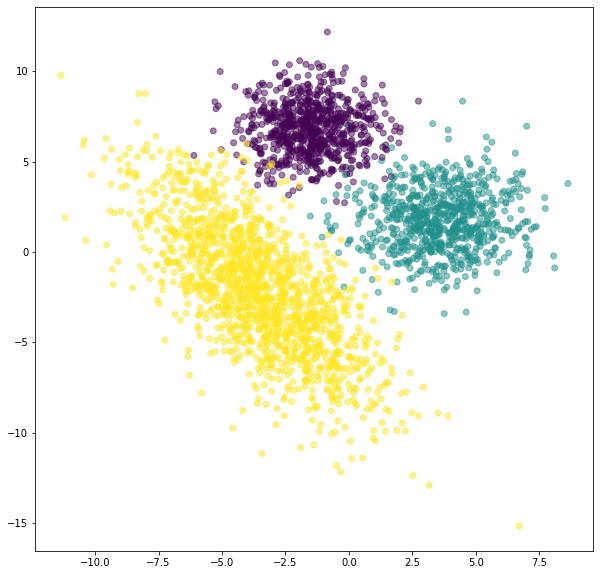

In [3]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [4]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

Part1: K-Means

In [5]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=42)

In [6]:
k_means.fit(X)

KMeans(n_clusters=3, random_state=42)

In [7]:
k_means.cluster_centers_

array([[-3.18494242, -2.909118  ],
       [-2.38267054,  6.21386031],
       [ 3.65090178,  1.74134602]])

In [8]:
np.round(k_means.cluster_centers_)

array([[-3., -3.],
       [-2.,  6.],
       [ 4.,  2.]])

In [9]:
k_means.labels_

array([2, 2, 1, ..., 0, 0, 0])

In [10]:
_, counts = np.unique(k_means.labels_, return_counts=True)
counts

array([1321,  938,  741], dtype=int64)

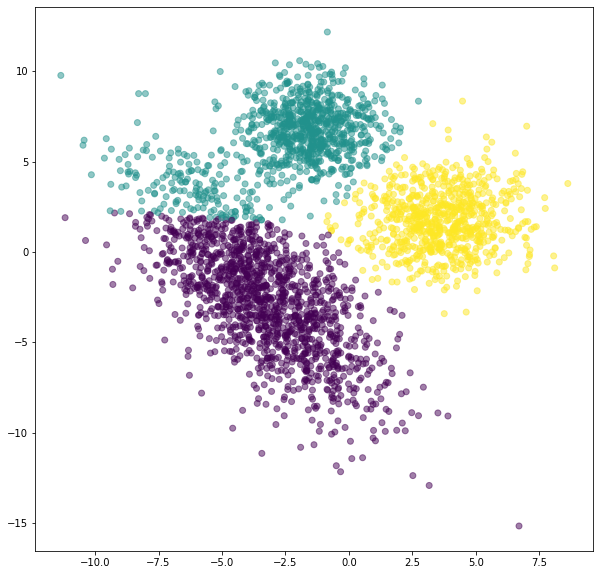

In [11]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

ЗАДАЧА НА РЕАЛЬНЫХ ДАННЫХ: КЛАСТЕРИЗАЦИЯ УЧЕНИКОВ СТАРШЕЙ ШКОЛЫ

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('snsdata.csv')

In [14]:
df.sample(5)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
10414,2007,F,18.352,36,0,0,0,3,0,0,...,0,0,3,0,0,0,0,0,0,1
14298,2007,F,17.952,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7814,2007,M,17.432,46,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5568,2006,F,18.185,13,1,0,0,2,0,0,...,0,1,0,0,0,0,0,0,0,0
18861,2008,F,16.523,36,1,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [16]:
df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1, inplace=True)
df.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
X1 = StandardScaler().fit_transform(df)

In [19]:
X1[:3]

array([[-0.33221726, -0.35769737, -0.2428741 , -0.21792782, -0.22366963,
        -0.25997057, -0.2073271 , -0.20113062, -0.1689389 , -0.29712339,
        -0.40236224, -0.18638435, -0.26732267, -0.26422495, -0.20261937,
         0.49445704, -0.26779479, -0.14142109, -0.58916128, -0.33779286,
        -0.34641063, -0.29755682, -0.19265386, -0.10424725, -0.38487252,
        -0.24690591, -0.05093652, -0.36991473, -0.48731424, -0.31419788,
        -0.20147627, -0.18303174, -0.29479321, -0.26153016, -0.22040264,
        -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , -0.21792782, -0.22366963,
        -0.25997057, -0.2073271 , -0.20113062, -0.1689389 , -0.29712339,
         0.84385573, -0.18638435, -0.26732267, -0.26422495, -0.20261937,
        -0.36571758, -0.26779479, -0.14142109,  1.00784241,  2.43858684,
         0.39807815, -0.29755682, -0.19265386, -0.10424725,  5.07991038,
         8.65327692, -0.05093652,  1.06739156, -0.48731424, -0.31419788,
        -0.20147627, -0.18303

In [20]:
k_means = KMeans(n_clusters=9, random_state=123)

In [21]:
k_means.fit(X1)

KMeans(n_clusters=9, random_state=123)

In [22]:
len(k_means.labels_)

30000

In [23]:
for i, counts in enumerate(np.unique(k_means.labels_, return_counts=True)):
    print(i, counts)

0 [0 1 2 3 4 5 6 7 8]
1 [20345   424   830     1  1026   932   644  5034   764]


In [24]:
df['cluster_label'] = k_means.labels_

In [25]:
for k, group in df.groupby('cluster_label'):
    print(k)
    top_words = group.iloc[:,:-1].mean().sort_values(ascending=False).head(10)
    print(top_words)

0
music         0.540477
god           0.312362
dance         0.213320
hair          0.180487
shopping      0.167117
basketball    0.160777
football      0.158073
band          0.154239
cute          0.148783
rock          0.147161
dtype: float64
1
god           4.742925
jesus         2.018868
church        1.740566
bible         1.108491
music         1.084906
hair          0.459906
band          0.410377
dance         0.389151
die           0.360849
basketball    0.351415
dtype: float64
2
hollister      1.522892
abercrombie    1.168675
shopping       0.920482
hair           0.913253
music          0.906024
dance          0.693976
mall           0.669880
cute           0.610843
god            0.457831
clothes        0.415663
dtype: float64
3
blonde      327.0
sex          22.0
hair         12.0
god          10.0
death         6.0
die           6.0
drunk         6.0
football      2.0
dress         2.0
sexy          1.0
dtype: float64
4
softball      2.548733
volleyball    1.967836
bask

Part2: EM

In [26]:
from sklearn.mixture import GaussianMixture

In [27]:
gm = GaussianMixture(n_components=3, random_state=42)

In [28]:
y_pred = gm.fit_predict(X)

In [29]:
X[:, 0]

array([ 4.67143114,  1.97552198, -0.59165564, ..., -3.26026403,
       -4.50973949,  0.29075162])

In [30]:
means = gm.means_
means

array([[-2.21861264, -4.15574239],
       [ 1.01124148,  4.31664695],
       [-4.94579669,  0.04257022]])

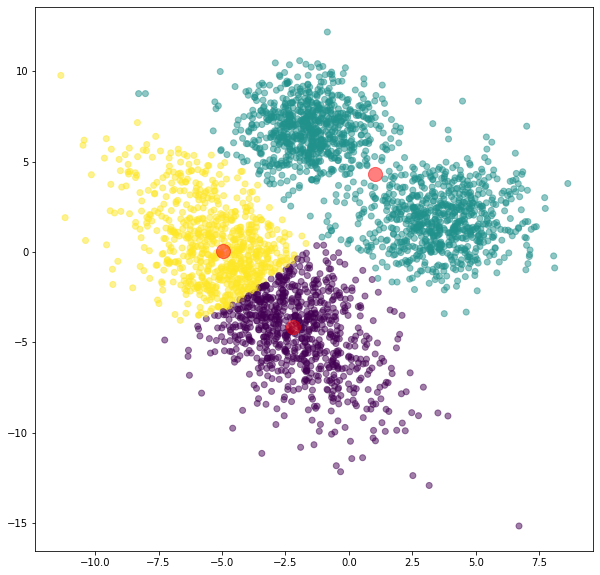

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
plt.scatter(means[:, 0], means[:, 1], c='red', s=200, alpha=0.5)
plt.show()

In [32]:
print(np.round(means).astype(np.int))

[[-2 -4]
 [ 1  4]
 [-5  0]]


In [33]:
_, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

788 1510 702 

In [34]:
import sklearn
sklearn.__version__

'0.23.2'

In [35]:
gm1 = GaussianMixture(n_components=9, random_state=123)

In [36]:
df.head(2)

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster_label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7


In [37]:
y_pred1 = gm1.fit_predict(X1)

In [38]:
print(y_pred1[7])

3


In [39]:
gm1.n_iter_

30